## Heisenberg'sche Unschärferelation am Beispiel von Teilchen im Kasten

### Aufgabe
Bestimmen Sie die Varianz und Standardabweichung für den Ort ($x$) und den Impuls ($p$) des Teilchens im Kasten mit einer Kastenlänge von $a$. Überlegen Sie, wie man hieraus die Heisenbergsche Unschärferelation erhalten kann.

$$\psi_n = N \cdot \sin \left( \frac{n \pi}{a} x \right);\quad n \in \mathbb{N}$$
$$\sigma_A^2 = \langle A^2 \rangle - \langle A \rangle^2$$

In [1]:
import sympy as sp
from sympy.physics.quantum.constants import hbar

x, N = sp.symbols('x N')
a = sp.Symbol('a', positive=True)
n = sp.Symbol('n', integer=True, positive=True)

**(a) Definieren Sie eine Funktion, die die Integrale für diese Aufgabe mit korrekten Grenzen ausführt.**

In [2]:
def integrate(expr):
    return sp.integrate(expr, (x, 0, a))

**(b) Bestimmen Sie $N$.**

In [3]:
wf = N * sp.sin((n*sp.pi/a) * x)
norm = integrate(wf**2)
norm

N**2*a/2

In [4]:
N_e = sp.solve(sp.Eq(norm, 1), N)[1]
N_e

sqrt(2)/sqrt(a)

**(c) Definieren Sie die Wellenfunktion $\psi_n$.**

In [5]:
psi = N_e * sp.sin((n*sp.pi/a) * x)
psi

sqrt(2)*sin(pi*n*x/a)/sqrt(a)

**(d) Bestimmen Sie $\sigma_x$.**

In [6]:
x_mean = integrate(sp.conjugate(psi) * x * psi)
x_mean = sp.simplify(x_mean)
x_mean

a/2

In [7]:
x_rms = integrate(sp.conjugate(psi) * x**2 * psi)
x_rms = sp.simplify(x_rms)
x_rms

a**2/3 - a**2/(2*pi**2*n**2)

In [8]:
var_x = x_rms - x_mean**2
sigma_x = sp.sqrt(var_x)
sigma_x

sqrt(a**2/12 - a**2/(2*pi**2*n**2))

**(e) Bestimmen Sie $\sigma_p$.**

In [9]:
p_mean = integrate(sp.conjugate(psi) * (-sp.I*hbar) * sp.diff(psi, x))
p_mean = sp.simplify(p_mean)
p_mean

0

In [10]:
p_rms = integrate(sp.conjugate(psi) * (-sp.I*hbar)**2 * sp.diff(psi, x, x))
p_rms = sp.simplify(p_rms)
p_rms

hbar**2*pi**2*n**2/a**2

In [11]:
var_p = p_rms - p_mean**2
sigma_p = sp.sqrt(var_p)
sigma_p

hbar*pi*n/a

**(f) Bestimmen Sie das Produkt $\sigma_x \cdot \sigma_p$.**

In [12]:
prod = sigma_x * sigma_p
prod = sp.simplify(prod)
prod

hbar*sqrt(3*pi**2*n**2 - 18)/6

In [13]:
prod.subs(n, 1)

hbar*sqrt(-18 + 3*pi**2)/6

In [14]:
(prod.subs(n, 1) / hbar).evalf()

0.567861808386612

In [15]:
uncertainty = sp.lambdify(n, prod/hbar)

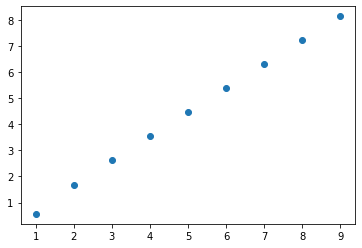

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n_range = np.arange(1, 10)
plt.scatter(n_range, uncertainty(n_range))